In [1]:
#Mounting The Google drive
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd gdrive/My\ Drive

/content/gdrive/My Drive


In [3]:
import numpy as np 
import cv2
import os
import shutil

#for plotting the metrics 
import matplotlib.pyplot as plt

# For real time data augmentation
from keras.preprocessing.image import ImageDataGenerator

#For developing the deep learning model
from keras.applications.vgg19 import VGG19, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop


Using TensorFlow backend.


In [0]:
#make dirctories in which the images should be divided
!mkdir TRAIN TEST VAL TRAIN/yes TRAIN/no TEST/yes TEST/no VAL/yes VAL/no

In [0]:
from os import listdir
img_path ='brain_tumor_dataset/'
# split the data by train/val/test
for File in listdir(img_path):
    
        img_num = len(listdir(img_path + File))
        for (n, File_name) in enumerate(listdir(img_path + File)):
            img = img_path + File + '/' + File_name
            if n < 8:
                shutil.copy(img, 'TEST/' + File + '/' + File_name)
            elif n < 0.8*img_num:
                shutil.copy(img, 'TRAIN/'+ File + '/' + File_name)
            else:
                shutil.copy(img, 'VAL/'+ File + '/' + File_name)

In [4]:
# for dealing with '.h5' models
!pip install --user cython h5py

In [5]:
!pip install --user git+https://github.com/Theano/Theano.git

  Cloning https://github.com/Theano/Theano.git to /tmp/pip-req-build-dpcu1720
  Running command git clone -q https://github.com/Theano/Theano.git /tmp/pip-req-build-dpcu1720
  Created wheel for Theano: filename=Theano-1.0.4+51.gf1e4ec47c-cp36-none-any.whl size=2667983 sha256=e3bf3d8d6c00dd3184c34670392713a97b1ca084ccc7c25a8ad7ac1f6b889468
  Stored in directory: /tmp/pip-ephem-wheel-cache-nytv2eye/wheels/14/72/17/35fc1366380e8e05fc8ed5d44e24a2da28ef975aa4be6aaa17
Successfully built Theano
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [6]:

!pip install --user git+https://github.com/fchollet/keras.git

  Cloning https://github.com/fchollet/keras.git to /tmp/pip-req-build-ocim2jzs
  Running command git clone -q https://github.com/fchollet/keras.git /tmp/pip-req-build-ocim2jzs
  Created wheel for Keras: filename=Keras-2.3.1-cp36-none-any.whl size=365124 sha256=dd92b616115dd8215112484c5457228874dac3402c416104e3de0ccdd0724d32
  Stored in directory: /tmp/pip-ephem-wheel-cache-m6ggxogz/wheels/9b/28/23/374425566fc615b7eeb7d748899ed3ce8d72851e4b5d22cc83
Successfully built Keras


*RESNET 50*

In [0]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input as Resnet_50_preprocessor

In [0]:
IMG_SIZE=[224,224]

In [0]:
train_datagen = ImageDataGenerator(preprocessing_function=Resnet_50_preprocessor)
val_datagen = ImageDataGenerator(preprocessing_function=Resnet_50_preprocessor)
test_datagen = ImageDataGenerator(preprocessing_function=Resnet_50_preprocessor)

In [11]:
train_generator = train_datagen.flow_from_directory('TRAIN', target_size=(224,224), color_mode='rgb', batch_size=32, class_mode='categorical',shuffle = False)
val_generator = val_datagen.flow_from_directory('VAL', target_size=(224,224), color_mode='rgb', batch_size=10, class_mode='categorical',shuffle = False) 


Found 187 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [12]:
resnet50_base_model = ResNet50(weights='imagenet',include_top=False,input_shape=IMG_SIZE + [3])

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step


In [0]:
resnet_model=Sequential()
resnet_model.add(resnet50_base_model)
resnet_model.add(layers.Dropout(0.3))
resnet_model.add(layers.Flatten())
resnet_model.add(layers.Dropout(0.5))
resnet_model.add(layers.Dense(2, activation='softmax'))

In [0]:
for layer in resnet50_base_model.layers:
   layer.trainable = False

In [0]:
#Compile the model
resnet_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [16]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 2048)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 100352)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 200706    
Total params: 23,788,418
Trainable params: 200,706
Non-trainable params: 23,587,712
_________________________________________________________________


In [17]:
resnet50_base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [18]:
resnet50_fit_model = resnet_model.fit_generator(train_generator, steps_per_epoch=6 , epochs=12,validation_data=val_generator,validation_steps=5)

Epoch 1/12
6/6 [==============================] - 48s 8s/step - loss: 7.1200 - accuracy: 0.3583 - val_loss: 0.4869 - val_accuracy: 0.8400
Epoch 2/12
6/6 [==============================] - 44s 7s/step - loss: 10.1927 - accuracy: 0.6684 - val_loss: 4.2915e-07 - val_accuracy: 0.7000
Epoch 3/12
6/6 [==============================] - 43s 7s/step - loss: 7.4214 - accuracy: 0.5294 - val_loss: 19.8113 - val_accuracy: 0.4200
Epoch 4/12
6/6 [==============================] - 43s 7s/step - loss: 0.0586 - accuracy: 0.9786 - val_loss: 5.9605e-08 - val_accuracy: 0.7200
Epoch 5/12
6/6 [==============================] - 44s 7s/step - loss: 0.2780 - accuracy: 0.9572 - val_loss: 0.0000e+00 - val_accuracy: 0.6200
Epoch 6/12
6/6 [==============================] - 44s 7s/step - loss: 1.1845 - accuracy: 0.8877 - val_loss: 0.0000e+00 - val_accuracy: 0.7200
Epoch 7/12
6/6 [==============================] - 44s 7s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.9777 - val_accuracy: 0.8600
Epoch 8/12
6

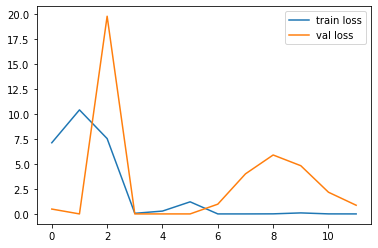

In [19]:
plt.plot(resnet50_fit_model.history['loss'], label='train loss')
plt.plot(resnet50_fit_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()


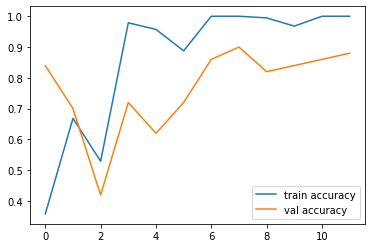

In [20]:
plt.plot(resnet50_fit_model.history['accuracy'], label='train accuracy')
plt.plot(resnet50_fit_model.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()


In [0]:
resnet_model.save('brain_tumour_classifier_Resnet_50.h5')

In [0]:
from keras.preprocessing import image
from keras.models import load_model

In [0]:
resnet_model = load_model('brain_tumour_classifier_Resnet_50.h5')

In [25]:
test_generator = test_datagen.flow_from_directory('TEST', target_size=(224,224), color_mode='rgb', batch_size=1, class_mode='categorical',shuffle = False)

Found 16 images belonging to 2 classes.


In [26]:
result2 = resnet_model.evaluate_generator(test_generator, steps=16)
print(result2)

[0.0, 0.75]


*VGG-16*

In [0]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

In [0]:
train_datagen = ImageDataGenerator(preprocessing_function=vgg16_preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=vgg16_preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=vgg16_preprocess_input)

In [30]:
train_generator = train_datagen.flow_from_directory('TRAIN', target_size=(224,224), color_mode='rgb', batch_size=32, class_mode='categorical',shuffle = False)
val_generator = val_datagen.flow_from_directory('VAL', target_size=(224,224), color_mode='rgb', batch_size=10, class_mode='categorical',shuffle = False) 


Found 187 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


In [31]:
vgg_16_base_model = VGG16(weights='imagenet',include_top=False,input_shape=IMG_SIZE+[3])

58892288/58889256 [==============================] - 1s 0us/step


In [32]:
from keras.layers import GlobalMaxPooling2D
x = vgg_16_base_model.output
x

<tf.Tensor 'block5_pool/MaxPool:0' shape=(None, 7, 7, 512) dtype=float32>

In [0]:
x = GlobalMaxPooling2D()(x)

In [0]:
from keras.layers import Dense
x = Dense(512,activation = 'relu')(x)
x = Dense(512,activation = 'relu')(x)
x = Dense(256, activation = 'relu')(x)

In [0]:
predictions = Dense(2,activation='softmax')(x)

In [36]:
Vgg_16 = Model(inputs = vgg_16_base_model.input, outputs = predictions)
Vgg_16.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [0]:
for layer in vgg_16_base_model.layers:
   layer.trainable = False

In [0]:
#Compile the model
Vgg_16.compile(loss='categorical_crossentropy',optimizer='Adam',metrics = ['accuracy'])

In [40]:
vgg_16_fit_model = Vgg_16.fit_generator(train_generator, steps_per_epoch=6 , epochs=12,validation_data=val_generator,validation_steps=5)

Epoch 1/12
6/6 [==============================] - 120s 20s/step - loss: 26.6213 - accuracy: 0.3316 - val_loss: 21.7605 - val_accuracy: 0.3800
Epoch 2/12
6/6 [==============================] - 118s 20s/step - loss: 11.4735 - accuracy: 0.4492 - val_loss: 0.7004 - val_accuracy: 0.8600
Epoch 3/12
6/6 [==============================] - 119s 20s/step - loss: 1.9560 - accuracy: 0.7540 - val_loss: 0.0269 - val_accuracy: 0.8600
Epoch 4/12
6/6 [==============================] - 119s 20s/step - loss: 0.9696 - accuracy: 0.8770 - val_loss: 0.0067 - val_accuracy: 0.8600
Epoch 5/12
6/6 [==============================] - 122s 20s/step - loss: 0.3111 - accuracy: 0.9144 - val_loss: 0.7598 - val_accuracy: 0.8800
Epoch 6/12
6/6 [==============================] - 119s 20s/step - loss: 0.2160 - accuracy: 0.9251 - val_loss: 0.0439 - val_accuracy: 0.9400
Epoch 7/12
6/6 [==============================] - 119s 20s/step - loss: 0.0396 - accuracy: 0.9786 - val_loss: 0.2692 - val_accuracy: 0.9200
Epoch 8/12
6/6 [=

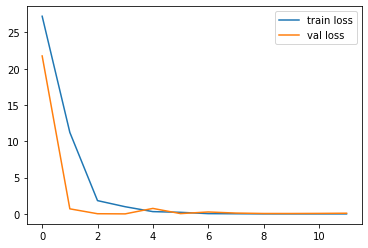

In [41]:
plt.plot(vgg_16_fit_model.history['loss'], label='train loss')
plt.plot(vgg_16_fit_model.history['val_loss'], label='val loss')
plt.legend()
plt.show()


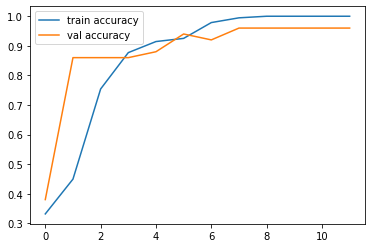

In [42]:
plt.plot(vgg_16_fit_model.history['accuracy'], label='train accuracy')
plt.plot(vgg_16_fit_model.history['val_accuracy'], label='val accuracy')
plt.legend()
plt.show()


In [0]:
Vgg_16.save('brain_tumour_classifier_Vgg_16.h5')

In [0]:
Vgg_16 = load_model('brain_tumour_classifier_Vgg_16.h5')

In [45]:
test_generator = test_datagen.flow_from_directory('TEST', target_size=(224,224), color_mode='rgb', batch_size=1, class_mode='categorical',shuffle = False)

Found 16 images belonging to 2 classes.


In [46]:
result3 = Vgg_16.evaluate_generator(test_generator, steps=16)
print(result3)

[0.0, 0.9375]
